# K-means clustering of shopping data

In [1]:
#K-means clustering of shopping data

#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Reading data set
shopping = pd.read_csv("shopping-data.csv")
x = shopping.iloc[:, [ 2, 3, 4]].values
shopping.info()
shopping[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#Label encoding categorical data
from sklearn.preprocessing import LabelEncoder

stringCol = shopping.iloc[:,1]
encoder = LabelEncoder()
encoder.fit(stringCol)
encoder.transform(stringCol)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [4]:
#Replace Genre values with encoded labels
shopping["Genre"].replace(to_replace=shopping["Genre"].tolist(), 
                      value=encoder.transform(stringCol),
                      inplace = True)
shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
#Frequency distribution of Genre
# Make a crosstab and name the count column
iris_outcome = pd.crosstab(index=shopping["Genre"], columns="count") 
iris_outcome

col_0,count
Genre,
0,112
1,88


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

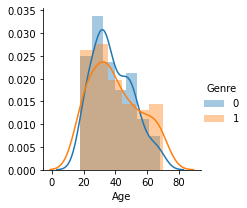

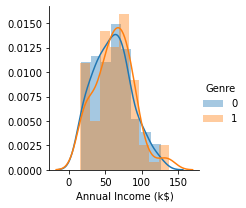

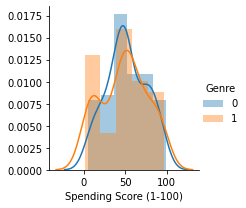

In [6]:
#Histograms of consumer attributes
sns.FacetGrid(shopping,hue="Genre",height=3).map(sns.distplot,"Age").add_legend()
sns.FacetGrid(shopping,hue="Genre",height=3).map(sns.distplot,"Annual Income (k$)").add_legend()
sns.FacetGrid(shopping,hue="Genre",height=3).map(sns.distplot,"Spending Score (1-100)").add_legend()
plt.show()

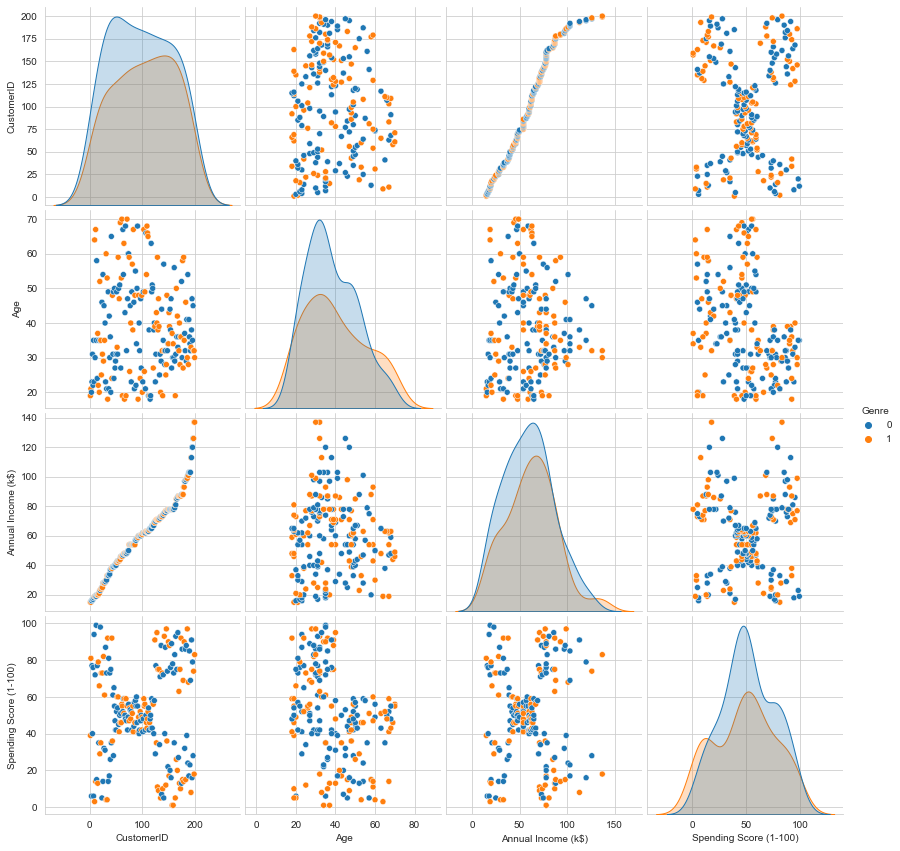

In [7]:
#Visualizing data distribution
#Scatter plot of features according to Genre
sns.set_style("whitegrid")
sns.pairplot(shopping, hue="Genre", height=3);
plt.show()

In [8]:
#Label encoding categorical data
from sklearn.preprocessing import LabelEncoder

floatCol = shopping.iloc[:,1]
encoder = LabelEncoder()
encoder.fit(floatCol)
encoder.transform(floatCol)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [9]:
print(x)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


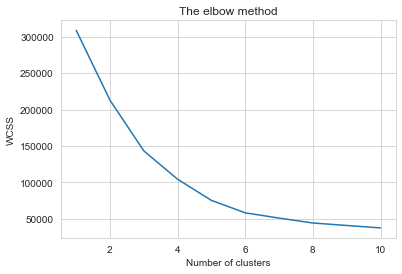

In [10]:

#Determine optimal number of clusters for K-means clustering
#Elbow method
from sklearn.cluster import KMeans
wcss = []  #within cluster sum of squares
##########  Here the problem is 'male' or ','?
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


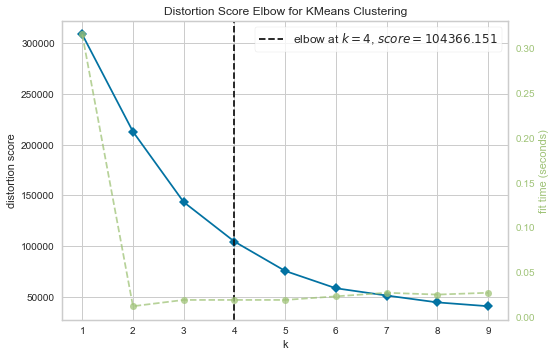

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Using ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(x)# Fit the data to the visualizer
visualizer.show()# Finalize and render the figure

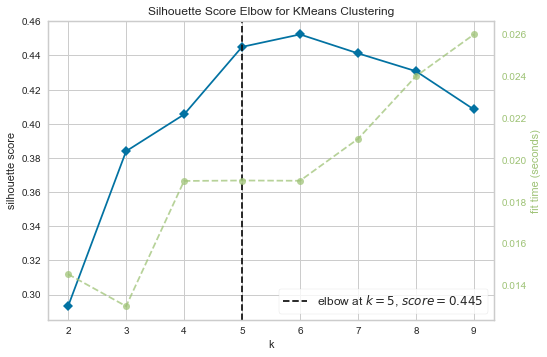

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
# Silhouette Score for K means using ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings= True)

visualizer.fit(x)# Fit the data to the visualizer
visualizer.show()# Finalize and render the figure

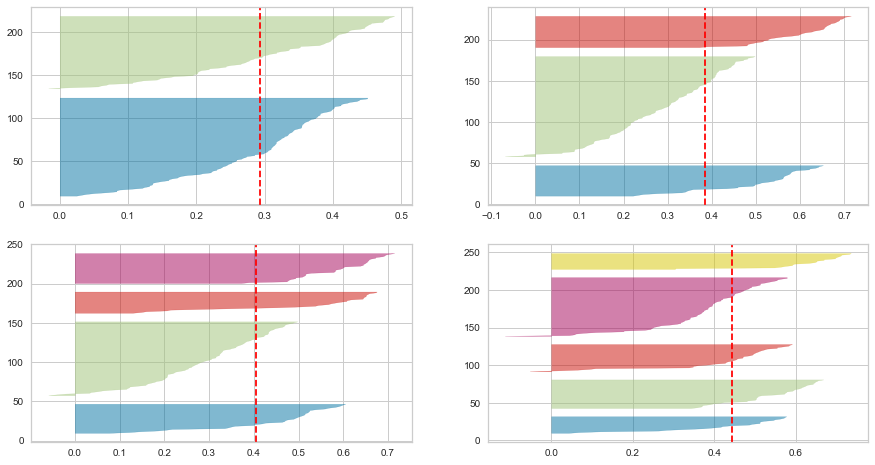

In [17]:
#Silhouette method using SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

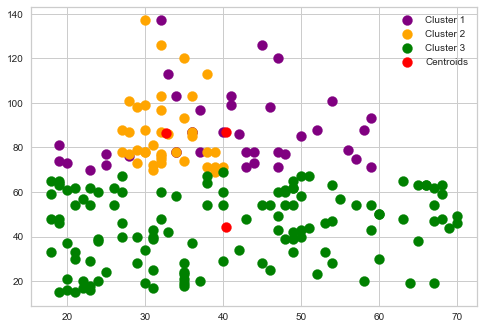

In [22]:
#Implementing K-means clustering
#Number of clusters : 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
#Plot sepal length and sepal width
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

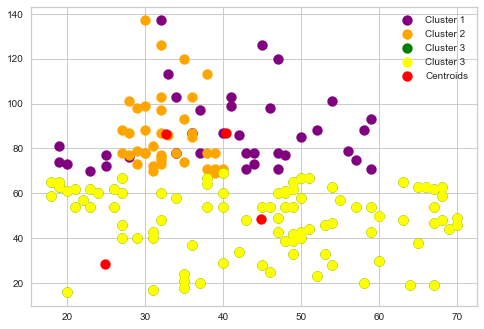

In [26]:
#Implementing K-means clustering
#Number of clusters : 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
#Plot sepal length and sepal width
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()